In [1]:
# from google.colab import drive
# drive.mount('/content/drive')
!pip install gdown
import gdown
#this way, anyone can access the files without mounting google driving. Accessing the csv files:
csvFileID = '1GZEf5NV8rX1xbqfaoOp0qrnhzyBQLZ0I'
url = f'https://drive.google.com/uc?id={csvFileID}'
csvOutputFile = 'binary_classification_train.csv'
gdown.download(url, csvOutputFile, quiet=False)

#accessing the module files:
moduleFileID = '1GoMIkWx8lbzUdWbcY5utwC011Jr1A2qi'
url = f'https://drive.google.com/uc?id={moduleFileID}'
moduleOutputFile = 'KNN.py'
gdown.download(url, moduleOutputFile, quiet=False)
from KNN import KNN
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Downloading...
From: https://drive.google.com/uc?id=1GZEf5NV8rX1xbqfaoOp0qrnhzyBQLZ0I
To: /content/binary_classification_train.csv
100%|██████████| 18.6M/18.6M [00:00<00:00, 19.0MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1GoMIkWx8lbzUdWbcY5utwC011Jr1A2qi
From (redirected): https://drive.google.com/uc?id=1GoMIkWx8lbzUdWbcY5utwC011Jr1A2qi&confirm=t&uuid=6ab62b86-3c30-471d-a267-b5ba2c7f9b05
To: /content/KNN.py
100%|██████████| 8.31k/8.31k [00:00<00:00, 17.5MB/s]


In [2]:
data = pd.read_csv(csvOutputFile)
data.head()

,ID,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Feature_12,Feature_13,Feature_14,Feature_15,Feature_16,Feature_17,Feature_18,Feature_19,Feature_20,Class
0,1,-36.963099,-15.014703,87.100435,101.523360,82.106571,-10.956180,0.592326,-51.919028,-90.650434,...,-81.183744,13.101921,18.051450,-40.606288,-39.697053,-13.870802,173.722987,-17.349169,-82.550844,0
1,2,-43.715674,18.847116,89.543406,-71.319314,35.597052,126.358570,-29.837495,-40.473764,-94.079238,...,-37.848260,7.457352,-77.420742,53.773718,-100.124294,9.870650,11.592519,-106.123605,-92.796421,1
2,3,-30.737550,-63.729643,106.081332,81.773948,112.769976,-12.425351,-29.913286,-41.771200,16.424511,...,-106.610289,5.930143,-30.177083,-138.969234,-56.054914,-12.790661,164.832498,-37.412902,-85.441150,0
3,4,-27.674757,-118.869495,135.605213,99.130189,50.947548,-63.704785,-7.353057,-58.140229,-80.209027,...,-149.056417,3.893419,-74.100869,-47.659832,-48.209817,-36.264323,59.001922,-59.064134,-78.538639,0
4,5,-28.654141,-77.746597,85.215365,50.374774,79.763207,-32.703048,-28.152031,-63.994794,-153.566789,...,-102.731465,11.160205,-13.395073,9.416237,2.649524,-43.578704,52.261888,-66.081738,-80.325110,0


In [4]:
feature_col = [f"Feature_{i}" for i in range(1,21)]
X = data[feature_col].to_numpy()
Y = data['Class'].to_numpy()
IDs = data['ID'].to_numpy()

In [5]:
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X = (X - X_mean) / X_std

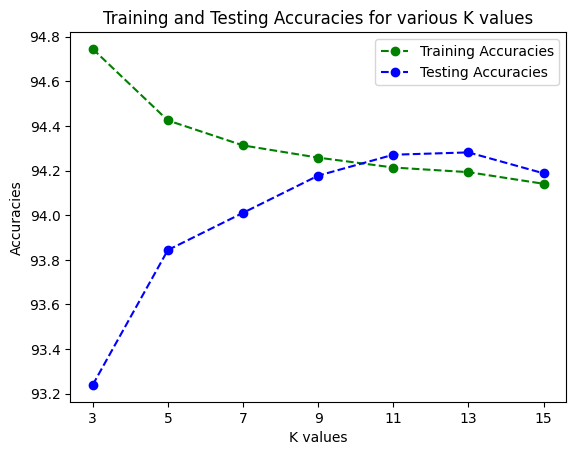

In [6]:
model = KNN(distance_metric='euclidean')
k_vals = [3,5,7,9,11,13,15]
model.get_elbow(X, Y, k_vals)

From the elbow curve, k = =11 is the best k value, Now training on k = 11

In [7]:
model2 = KNN()
y_preds = model2.predict(X, Y, X, knn_k=11)
print(np.mean(y_preds == Y))
model2.print_con_mat(model2.get_conf_mat(Y, y_preds))
model2.classification_report(Y, y_preds)

0.9432916666666666
Confusion matrix with predictions on X axis and actual values on Y
         0        1
0  32022.0    694.0
1   2028.0  13256.0
                    precision    recall  f1-score  support
0                    0.940441  0.978787  0.959231  32716.0
1                    0.950251  0.867312  0.906889  15284.0
Average (weighted)   0.943564  0.943292  0.942564  48000.0
Accuracy: 94.32916666666667%
